In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv('datasetkdd.csv')
data.head()  


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:

print("Shape of the dataset:", data.shape)
print("Data types and null values:\n", data.info())
data.describe()


Shape of the dataset: (148517, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  float64
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  float64
 5   dst_bytes                    148517 non-null  float64
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  float64
 8   urgent                       148517 non-null  float64
 9   hot                          148517 non-null  float64
 10  num_failed_logins            148517 non-null  float64
 11  logged_in                    148517 non-null  int64  
 12  num_compromised        

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,183.928042,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,98.528328,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
X = data.drop(columns=["class"])
y = data['class']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# Encode categorical features
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
X.head()



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,1,20,9,491.0,0.0,0,0.0,0.0,0.0,...,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,2,44,9,146.0,0.0,0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,...,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,1,24,9,232.0,8153.0,0,0.0,0.0,0.0,...,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,1,24,9,199.0,420.0,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:

from sklearn.decomposition import PCA
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= 0.9) + 1

# Perform PCA with the number of components for 90% variance
pca = PCA(n_components=n_components)
features_reduced= pca.fit_transform(X_scaled)
features_reduced_df = pd.DataFrame(features_reduced, columns=[f'PC{i+1}' for i in range(features_reduced.shape[1])])
features_reduced_df.head()



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,0.937416,-0.099287,-0.033490,0.114524,0.112026,0.446328,0.370811,-0.123425,0.165005,0.209008,...,0.044836,-0.007273,-0.000624,-0.109288,-0.113773,0.159973,-0.213416,-0.607659,-0.289704,0.154749
1,-0.685951,0.530801,0.084341,-0.314059,-0.079046,2.454923,3.183684,-0.747470,-0.687928,-0.280957,...,-0.052041,-0.035434,-0.162862,0.153964,0.076350,0.262859,-0.348077,-1.279437,0.372079,1.344555
2,-3.557238,-2.531658,0.044006,0.309697,0.259197,-0.446973,0.130156,-0.014142,0.166662,0.091613,...,0.013209,0.020884,0.057553,-0.047812,-0.020766,0.031099,-0.034057,0.207654,0.118251,0.291461
3,2.613555,-0.501687,-0.070456,0.034864,0.304282,-1.015089,-0.093341,-0.047633,0.012301,-0.235640,...,0.033286,-0.002174,-0.056807,0.042842,-0.049509,0.147941,-0.022227,-0.199034,-0.887815,0.019916
4,2.403517,-0.363544,-0.127620,-1.076496,-0.106070,-0.662833,-0.163658,0.015152,-0.018131,-0.343138,...,-0.003715,0.008866,-0.033182,0.103210,0.095107,0.034632,0.016426,0.411946,-0.088896,-0.453858


In [7]:
X_train, X_test, y_train, y_test = train_test_split(features_reduced_df, y_encoded, test_size=0.2, random_state=42)

In [8]:
#Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

Naive Bayes Model - Accuracy: 0.8778
Naive Bayes Model - Precision: 0.8516
Naive Bayes Model - Recall: 0.9265
Naive Bayes Model - F1 Score: 0.8875


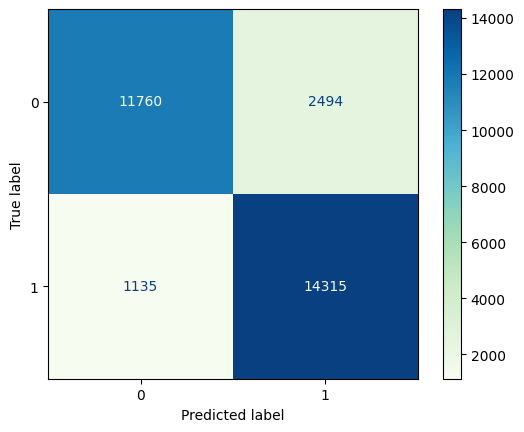

In [9]:
acc_nb = accuracy_score(y_test, y_pred_nb)
pre_nb = precision_score(y_test, y_pred_nb)
re_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print(f"Naive Bayes Model - Accuracy: {acc_nb:.4f}")
print(f"Naive Bayes Model - Precision: {pre_nb:.4f}")
print(f"Naive Bayes Model - Recall: {re_nb:.4f}")
print(f"Naive Bayes Model - F1 Score: {f1_nb:.4f}")

cm_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(cm_nb).plot(cmap='GnBu')
plt.show()

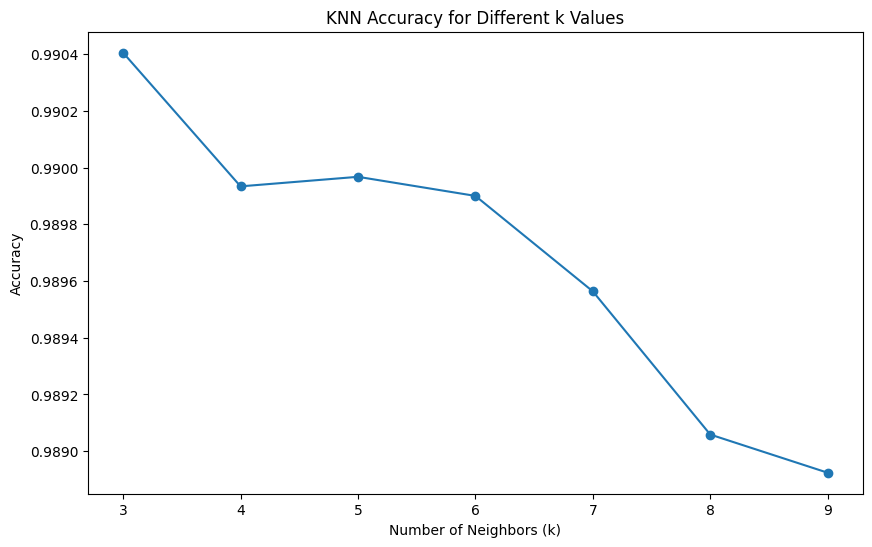

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

accuracies = []
k_values = range(3,10)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.show()

In [16]:
optimal_k = k_values[np.argmax(accuracies)]
print(f"Optimal k: {optimal_k}")

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_knn = knn.predict(X_test)

Optimal k: 3


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')  
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.9904
Precision: 0.9904
Recall: 0.9904
F1-score: 0.9904


In [19]:
print("Model Comparison")
print("****************************************************")
print(f"{'Model':<15} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1 Score':<10}")
print("-" * 55)
print(f"{'Naive Bayes':<15} {acc_nb:.4f}      {pre_nb:.4f}      {re_nb:.4f}      {f1_nb:.4f}")
print(f"{'KNN':<15} {accuracy:.4f}      {precision:.4f}      {recall:.4f}      {f1:.4f}")


Model Comparison
****************************************************
Model           Accuracy   Precision  Recall     F1 Score  
-------------------------------------------------------
Naive Bayes     0.8778      0.8516      0.9265      0.8875
KNN             0.9904      0.9904      0.9904      0.9904
